<a href="https://colab.research.google.com/github/PKVEMULA-HDS5210/ORES-5160-PK/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FINAL PROJECT BACKGROUND**

Being a pharmacy student, I have knowledge about the dataset through my research interest, also involvement in projects related to public health, epidemiology, and healthcare data analysis.The dataset is originated from the Behavioral Risk Factor Surveillance System (BRFSS), a comprehensive annual telephone survey conducted by the Centers for Disease Control and Prevention (CDC). The BRFSS dataset, comprising 2022 annual survey data of over 400,000 U.S. adults, specifically addresses key indicators of heart disease and associated risk factors.

The dataset covers a range of variables related to heart disease risk, including high blood pressure, high cholesterol, smoking habits, diabetes status, obesity, physical activity levels, and alcohol consumption. These variables are crucial in identifying and understanding the factors that significantly impact heart disease, which is a leading cause of mortality across various racial groups in the U.S.

For instance, the dataset includes information on whether respondents have had a heart attack ("HadHeartAttack"), treated as a binary variable ("Yes" or "No"). This binary classification allows for the exploration of factors influencing the likelihood of heart disease.

The dataset has undergone a significant curation process, where the original set of nearly 300 variables was narrowed down to 40 relevant variables for analysis. This reduction facilitates more focused and targeted exploratory data analysis (EDA) and opens avenues for applying machine learning methods, particularly classifier models like logistic regression, SVM, and random forest.



**Problem Statement:**
Cardiovascular diseases (CVDs) are a leading cause of global morbidity and mortality. The traditional methods of diagnosing and managing heart conditions often lack precision and real-time insights. Additionally, the sheer volume and complexity of heart-related data generated from various sources, such as wearable devices, electronic health records, and medical imaging, create challenges in harnessing valuable information for personalized care.


**DATASETS USED:**

heart_dataset.csv as CSV file copied from the source.




https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data retrived from source.


https://data.cdc.gov/api/views/uc9k-vc2j/rows.json?accessType=DOWNLOAD downloaded from source.





In [35]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats

### **import multiple datasets**

The process of importing multiple datasets from different sources and merging them into a single DataFrame using Python's Pandas library.
The first dataset, related to heart disease, is read from a CSV file using Pandas and stored in the heart_disease_data DataFrame.Then a URL pointing to the CDC API, specifically to a JSON representation of the dataset. It then uses the requests.get method to fetch the data from the URL.


In summary, this code reads a heart disease dataset from a CSV file, fetches another dataset from the CDC API in JSON format, and merges them into a single DataFrame (df). This can be useful when combining information from different sources for comprehensive analysis.

In [36]:
heart_disease_data = pd.read_csv("/content/heart_dataset.csv")

In [37]:
import requests
import json
import pandas as pd

url = "https://data.cdc.gov/api/views/uc9k-vc2j/rows.json?accessType=DOWNLOAD"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()

    columns = data['meta']['view']['columns']
    rows = data['data']

    df = pd.DataFrame(rows, columns=[col['name'] for col in columns])

else:
    print(f"Error: Unable to fetch data. Status code: {response.status_code}")


In [38]:
df.head(5)

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,LocationID,Year,...,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,TopicID,X_long,Y_lat
0,row-wpdw-zy3s.qt83,00000000-0000-0000-C42D-451E70333550,0,1644345959,None,1644345959,None,{ },01001,2000,...,None,Age group,Ages 35-64 years,Race/EthnicityAge group,American Indian and Alaska Native,Sex,Overall,T1,-86.64295911,32.53530561
1,row-uf7n~5zpy-pgwu,00000000-0000-0000-78CB-31D19871E204,0,1644345959,None,1644345959,None,{ },01001,2001,...,None,Age group,Ages 35-64 years,Race/EthnicityAge group,American Indian and Alaska Native,Sex,Overall,T1,-86.64295911,32.53530561
2,row-ubhu~pwqd_t45e,00000000-0000-0000-0F92-FE6FE0F0880C,0,1644345959,None,1644345959,None,{ },01001,2002,...,None,Age group,Ages 35-64 years,Race/EthnicityAge group,American Indian and Alaska Native,Sex,Overall,T1,-86.64295911,32.53530561
3,row-2ins-eace-qnru,00000000-0000-0000-5D11-EB9D14CCE12B,0,1644345959,None,1644345959,None,{ },01001,2003,...,None,Age group,Ages 35-64 years,Race/EthnicityAge group,American Indian and Alaska Native,Sex,Overall,T1,-86.64295911,32.53530561
4,row-mcvc~x6dk_defb,00000000-0000-0000-6475-220925B04CD9,0,1644345959,None,1644345959,None,{ },01001,2004,...,None,Age group,Ages 35-64 years,Race/EthnicityAge group,American Indian and Alaska Native,Sex,Overall,T1,-86.64295911,32.53530561


In [39]:
df.shape

(1103872, 32)

### Merging datasets

In [40]:
heart_disease_data = pd.concat([heart_disease_data.iloc[:319795, :], df.iloc[:319795, :]], axis=1)

print(heart_disease_data.shape)

(319795, 50)


In [41]:
heart_disease_data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Confidence_limit_High,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,TopicID,X_long,Y_lat
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,None,Age group,Ages 35-64 years,Race/EthnicityAge group,American Indian and Alaska Native,Sex,Overall,T1,-86.64295911,32.53530561
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,None,Age group,Ages 35-64 years,Race/EthnicityAge group,American Indian and Alaska Native,Sex,Overall,T1,-86.64295911,32.53530561
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,None,Age group,Ages 35-64 years,Race/EthnicityAge group,American Indian and Alaska Native,Sex,Overall,T1,-86.64295911,32.53530561
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,None,Age group,Ages 35-64 years,Race/EthnicityAge group,American Indian and Alaska Native,Sex,Overall,T1,-86.64295911,32.53530561
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,None,Age group,Ages 35-64 years,Race/EthnicityAge group,American Indian and Alaska Native,Sex,Overall,T1,-86.64295911,32.53530561


In [42]:
heart_disease_data.shape

(319795, 50)

In [43]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HeartDisease                319795 non-null  object 
 1   BMI                         319795 non-null  float64
 2   Smoking                     319795 non-null  object 
 3   AlcoholDrinking             319795 non-null  object 
 4   Stroke                      319795 non-null  object 
 5   PhysicalHealth              319795 non-null  float64
 6   MentalHealth                319795 non-null  float64
 7   DiffWalking                 319795 non-null  object 
 8   Sex                         319795 non-null  object 
 9   AgeCategory                 319795 non-null  object 
 10  Race                        319795 non-null  object 
 11  Diabetic                    319795 non-null  object 
 12  PhysicalActivity            319795 non-null  object 
 13  GenHealth     

### Data Aggregation

In [44]:
heart_disease_data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime,position,created_at,updated_at
count,319795.000000,319795.00000,319795.000000,319795.000000,319795.0,3.197950e+05,3.197950e+05
mean,28.325399,3.37171,3.898366,7.097075,0.0,1.644346e+09,1.644346e+09
std,6.356100,7.95085,7.955235,1.436007,0.0,0.000000e+00,0.000000e+00
min,12.020000,0.00000,0.000000,1.000000,0.0,1.644346e+09,1.644346e+09
25%,24.030000,0.00000,0.000000,6.000000,0.0,1.644346e+09,1.644346e+09
50%,27.340000,0.00000,0.000000,7.000000,0.0,1.644346e+09,1.644346e+09
75%,31.420000,2.00000,3.000000,8.000000,0.0,1.644346e+09,1.644346e+09
max,94.850000,30.00000,30.000000,24.000000,0.0,1.644346e+09,1.644346e+09


In [45]:
heart_disease_data.describe()[1:][['BMI','PhysicalHealth','MentalHealth', 'SleepTime']].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


**Output Explanation:**
The output is a stylized descriptive statistical summary for the specified columns. Each statistic (mean, std, min, 25%, 50%, 75%, max) is presented for 'BMI', 'PhysicalHealth', 'MentalHealth', and 'SleepTime'. The background gradient, in shades of blue, helps to visually highlight the magnitude of each statistic. Darker shades may indicate higher values, while lighter shades may indicate lower values.

**For example:**

**BMI:** The mean BMI is approximately 28.33, with a standard deviation of 6.36. The range (min to max) is from 12.02 to 94.85.

**PhysicalHealth:**The mean physical health score is around 3.37, with a standard deviation of 7.95. The scores range from 0 to 30.

**MentalHealth:** The mean mental health score is about 3.90, with a standard deviation of 7.96. Scores also range from 0 to 30.

**SleepTime**: The mean sleep time is 7.10 hours, with a standard deviation of 1.44. Sleep time ranges from 1 to 24 hours.

### pivoting

In [46]:

pivot_table = pd.pivot_table(heart_disease_data, values='BMI', index=['Sex', 'AlcoholDrinking'], aggfunc='mean')

print(pivot_table)


                              BMI
Sex    AlcoholDrinking           
Female No               28.265284
       Yes              26.732297
Male   No               28.532413
       Yes              28.140912


In [47]:

pivot_table = pd.pivot_table(heart_disease_data, values='BMI', index=['Sex', 'HeartDisease'], aggfunc='mean')

print(pivot_table)

                           BMI
Sex    HeartDisease           
Female No            28.075363
       Yes           29.375993
Male   No            28.396724
       Yes           29.419411


### DATA Transformation

In [48]:
heart_disease_data['HeartDisease'] = heart_disease_data['HeartDisease'].map({'Yes': 1, 'No': 0})

In [49]:
heart_disease_data['Confidence_limit_Low'] = heart_disease_data['Confidence_limit_Low'].replace('None', np.nan)

heart_disease_data['Confidence_limit_Low'] = pd.to_numeric(heart_disease_data['Confidence_limit_Low'])

mean_value = heart_disease_data['Confidence_limit_Low'].mean()

heart_disease_data['Confidence_limit_Low'].fillna(mean_value, inplace=True)

In [50]:
heart_disease_data['Confidence_limit_High'] = heart_disease_data['Confidence_limit_High'].replace('None', np.nan)

heart_disease_data['Confidence_limit_High'] = pd.to_numeric(heart_disease_data['Confidence_limit_High'])

mean_value = heart_disease_data['Confidence_limit_High'].mean()

heart_disease_data['Confidence_limit_High'].fillna(mean_value, inplace=True)

In [51]:
heart_disease_data['Data_Value'] = heart_disease_data['Data_Value'].replace('None', np.nan)

heart_disease_data['Data_Value'] = pd.to_numeric(heart_disease_data['Data_Value'])

mean_value = heart_disease_data['Data_Value'].mean()

heart_disease_data['Data_Value'].fillna(mean_value, inplace=True)

In [52]:
heart_disease_data['Smoking'] = heart_disease_data['Smoking'].map({'Yes': 1, 'No': 0})

In [53]:
heart_disease_data['Smoking']

0         1
1         0
2         1
3         0
4         0
         ..
319790    1
319791    1
319792    0
319793    0
319794    0
Name: Smoking, Length: 319795, dtype: int64

###**DATA VISUALIZATION**


Data visualization is the graphical representation of information and data through charts, graphs, and other visual elements. It serves the purpose of making complex datasets more understandable and accessible, allowing users to identify patterns, trends, and insights efficiently. Visualization is a powerful tool in the data analysis process, aiding in the communication of findings and supporting informed decision-making.

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [55]:
def add_pie_subplot(fig, data, feature, row, col):
    color_schemes = {
        'HeartDisease': ['#4285f4', '#ea4335', '#fbbc05', '#34a853'],
        'Smoking': ['#4CAF50', '#FFC107', '#9C27B0', '#2196F3'],
        'AlcoholDrinking': ['#FF5722', '#673AB7', '#3F51B5', '#009688'],
        'Stroke': ['#795548', '#607D8B', '#FF9800', '#E91E63'],
        'DiffWalking': ['#8BC34A', '#FFEB3B', '#FF5722', '#009688'],
        'Sex': ['#FFC107', '#2196F3'],
        'Race': ['#9C27B0', '#4CAF50', '#FF9800', '#E91E63'],
        'Diabetic': ['#FF5722', '#673AB7', '#3F51B5', '#009688'],
        'PhysicalActivity': ['#607D8B', '#FFEB3B', '#FFC107', '#8BC34A'],
        'GenHealth': ['#2196F3', '#FFC107', '#FF5722', '#673AB7'],
        'Asthma': ['#4CAF50', '#9C27B0', '#FF5722', '#607D8B'],
        'KidneyDisease': ['#FF9800', '#E91E63', '#795548', '#3F51B5'],
        'SkinCancer': ['#673AB7', '#FF5722', '#FFEB3B', '#8BC34A']
    }

    labels = np.array(data[feature].value_counts().index)
    values = [x for x in data[feature].value_counts()]

    fig.add_trace(go.Pie(labels=labels, values=values, hole=0.35,
                         textinfo='label+percent', rotation=-45, marker_colors=color_schemes.get(feature, ['#4285f4', '#ea4335', '#fbbc05', '#34a853'])),
                  row=row, col=col)

fig = make_subplots(rows=7, cols=2, subplot_titles=("HeartDisease", "Smoking",
                                                    "AlcoholDrinking", "Stroke",
                                                    "DiffWalking", "Sex",
                                                    'Race', 'Diabetic',
                                                    'PhysicalActivity', 'GenHealth',
                                                    'Asthma', 'KidneyDisease', 'SkinCancer'),
                    specs=[[{"type": "domain"}, {"type": "domain"}],
                           [{"type": "domain"}, {"type": "domain"}],
                           [{"type": "domain"}, {"type": "domain"}],
                           [{"type": "domain"}, {"type": "domain"}],
                           [{"type": "domain"}, {"type": "domain"}],
                           [{"type": "domain"}, {"type": "domain"}],
                           [{"type": "domain"}, {"type": "domain"}]])

for i, feature in enumerate(["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke",
                             "DiffWalking", "Sex", 'Race', 'Diabetic',
                             'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']):
    add_pie_subplot(fig, heart_disease_data, feature, i // 2 + 1, i % 2 + 1)

fig.update_layout(height=3200, font=dict(size=14), showlegend=False)
fig.show()



The code generates a subplot grid of pie charts, each representing the distribution of a specific health-related variable in the 'heart_disease_data' dataset. The resulting visualization provides insights into the prevalence of different health conditions and risk factors among the surveyed individuals.


The pie chart provides insights into responses regarding whether individuals have been informed by a doctor about experiencing a heart attack. The data is segmented by both gender and age groups, yielding the following details:

**Overall:**

Approximately 1.8% of women acknowledged having a history of heart attacks.

Notably, men reported a higher percentage (2.6%) compared to women (1.0%).
Age Groups:

The likelihood of women having experienced a heart attack rises with age.

For instance, only 0.2% of women aged 18-24 reported a heart attack history, contrasting with 5.2% of women aged 65 and above.
Gender:

Confirming the earlier trend, men consistently show a higher percentage of reported heart attacks compared to women.

This distinction is particularly pronounced in younger age groups. For example, 0.4% of women aged 18-24 disclosed a history of heart attacks, while 1.0% of men in the same age bracket reported similar experiences.

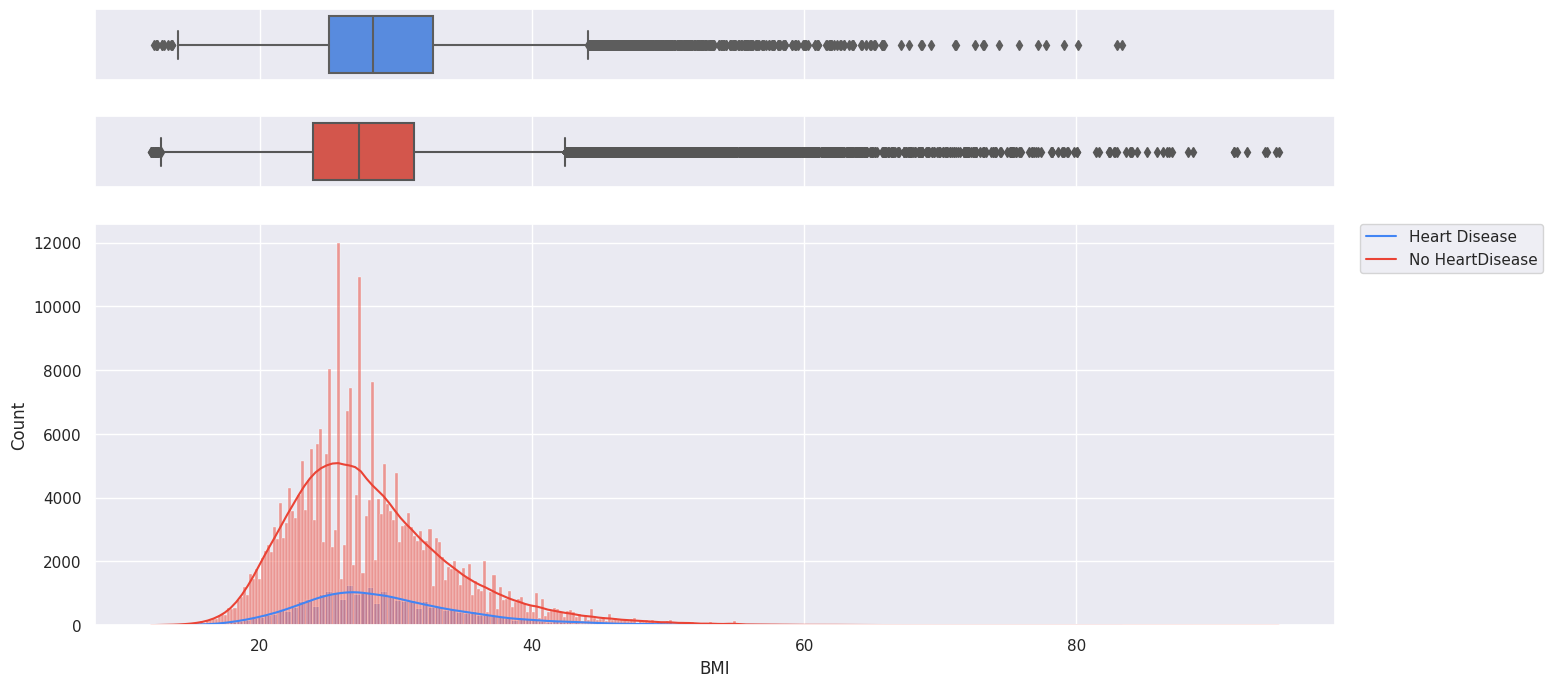

In [56]:


def plot_box_and_hist(data, feature, colors):
    f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})

    sns.boxplot(x=data[data['HeartDisease']==1][feature], ax=ax_box1, color=colors[0])
    sns.histplot(data[data['HeartDisease']==1], x=feature, ax=ax_hist, kde=True, color=colors[0])

    sns.boxplot(x=data[data['HeartDisease']==0][feature], ax=ax_box2, color=colors[1])
    sns.histplot(data[data['HeartDisease']==0], x=feature, ax=ax_hist, kde=True, color=colors[1])

    ax_box1.set(xlabel='')
    ax_box2.set(xlabel='')

    plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'], bbox_to_anchor=(1.02, 1), borderaxespad=0.)
    plt.show()

sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})

colors = ['#4285f4', '#ea4335']

plot_box_and_hist(heart_disease_data, 'BMI', colors)


<ipython-input-57-048cff75a865>:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-57-048cff75a865>:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




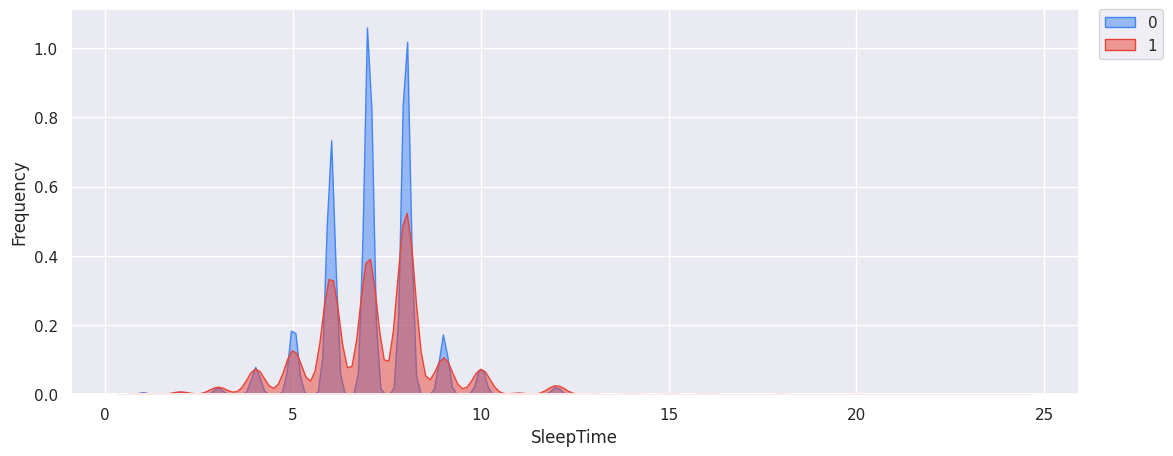

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_kde(data, feature, colors, label_names):
    fig, ax = plt.subplots(figsize=(13, 5))

    for i, label in enumerate(label_names):
        sns.kdeplot(data[data["HeartDisease"]==label][feature], alpha=0.5, shade=True, color=colors[i], label=label, ax=ax)

    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    plt.show()

colors = ['#4285f5', '#ea4335']
label_names = [0, 1]

plot_kde(heart_disease_data, 'SleepTime', colors, label_names)


<ipython-input-58-d80bf44331c3>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-58-d80bf44331c3>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




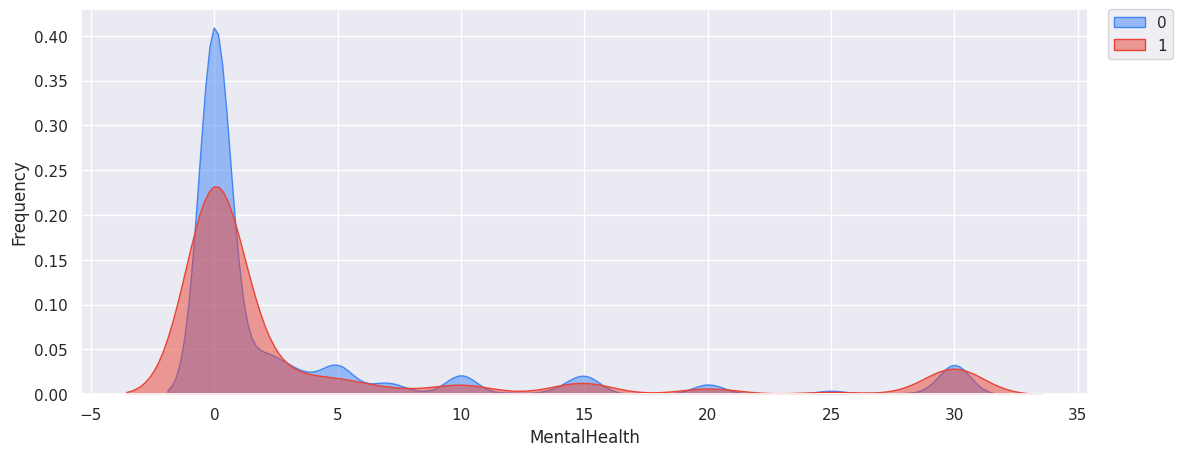

In [58]:

def plot_mental_health_kde(data, feature, colors, label_names):
    fig, ax = plt.subplots(figsize=(13, 5))

    for i, label in enumerate(label_names):
        sns.kdeplot(data[data["HeartDisease"]==label][feature], alpha=0.5, shade=True, color=colors[i], label=label, ax=ax)

    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
    plt.show()

# Define colors and label names
colors = ['#4285f4', '#ea4335']
label_names = [0, 1]

# Call the function with your data and feature
plot_mental_health_kde(heart_disease_data, 'MentalHealth', colors, label_names)


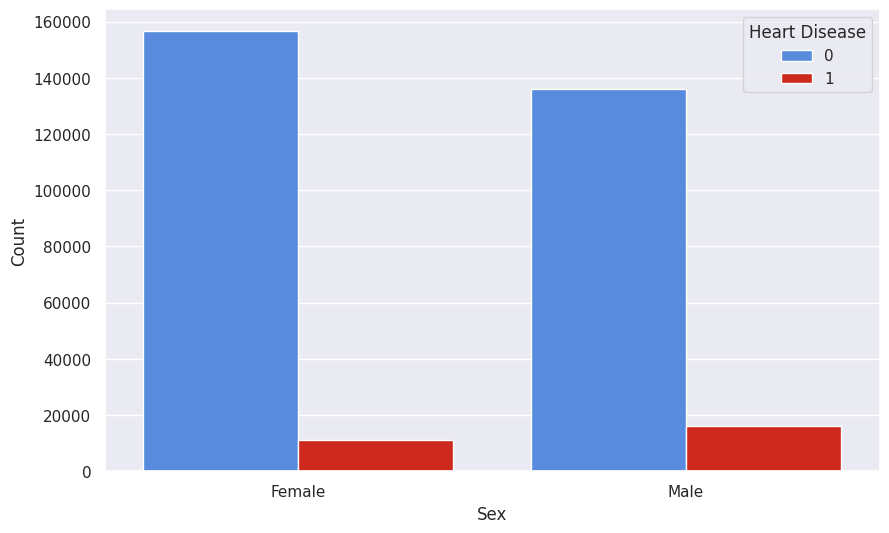

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.countplot(
    x="Sex",
    hue="HeartDisease",
    data=heart_disease_data,
    palette={0: "#4285f4", 1: "#ea1000"}
)

plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Heart Disease", loc="upper right")

plt.show()


The countplot from the Seaborn library is used to create a bar plot to visualize the distribution of individuals with and without heart disease based on gender.

X-axis (x="Sex"): The x-axis represents the categorical variable "Sex," which likely contains two categories, presumably "Male" and "Female." Each bar on the x-axis corresponds to one of these categories.

Y-axis (y="Count"): The y-axis represents the count or frequency of individuals falling into each category on the x-axis. The count indicates how many individuals are present for each gender category.

The resulting plot visually compares the distribution of heart disease among different genders. Each bar represents the count of individuals for a specific gender, and the bars are split into two sections, each colored according to the presence or absence of heart disease.

In [60]:
female_heart_disease_count = len(heart_disease_data[(heart_disease_data['HeartDisease'] == 1) & (heart_disease_data['Sex'] == 'Female')])
total_female_count = len(heart_disease_data[heart_disease_data['Sex'] == 'Female'])

male_heart_disease_count = len(heart_disease_data[(heart_disease_data['HeartDisease'] == 1) & (heart_disease_data['Sex'] == 'Male')])
total_male_count = len(heart_disease_data[heart_disease_data['Sex'] == 'Male'])

probability_male_heart_disease = male_heart_disease_count / total_male_count
print('Probability of Males having Heart Disease:', probability_male_heart_disease)

probability_female_heart_disease = female_heart_disease_count / total_female_count
print('Probability of Females having Heart Disease:', probability_female_heart_disease)


Probability of Males having Heart Disease: 0.10618461740904007
Probability of Females having Heart Disease: 0.06694675367241738


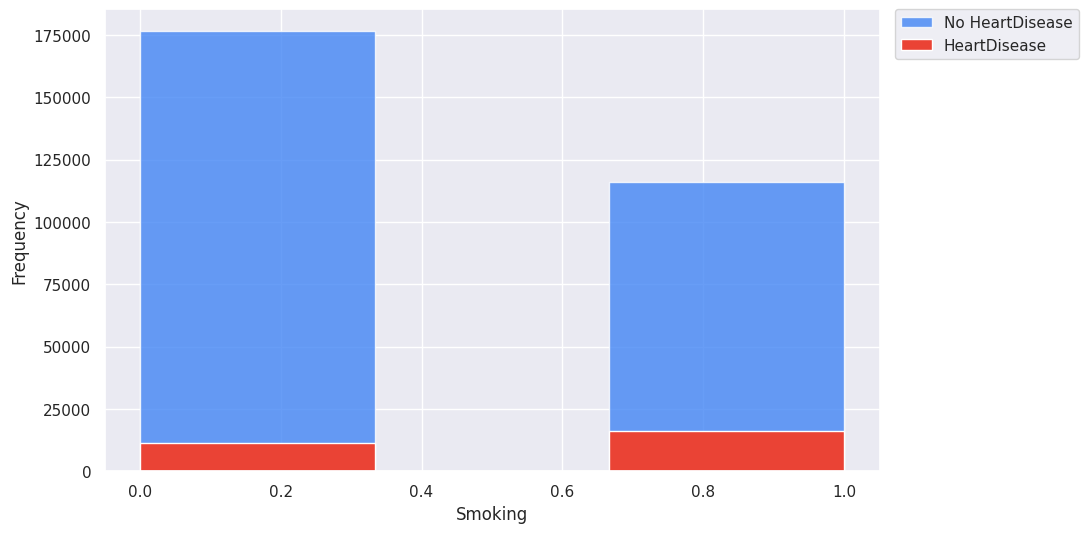

In [61]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heart_disease_data[heart_disease_data["HeartDisease"]==0]["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease_data[heart_disease_data["HeartDisease"]==1]["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

The x-axis in this chart stands for the "Smoking" variable, likely showcasing different categories related to smoking habits. Unfortunately, detailed labels for these categories are unavailable at the moment.

As for the y-axis, it displays the frequency of occurrences, illustrating the count of individuals falling into each histogram bin.

The output reveals a histogram neatly split into two sets of bars, each corresponding to a distinct value of the "HeartDisease" variable—0 representing "No HeartDisease" and 1 for "HeartDisease." To enhance visual clarity when bars overlap, the alpha parameter adjusts the transparency of the bars.

The blue bars signify individuals without heart disease, while the red bars represent those with heart disease.

By setting the bins parameter to 3, the data is organized into three intervals, providing a visual overview of the distribution of smoking habits for both groups.

For easier comprehension, the legend positioned in the upper right corner color-codes "No HeartDisease" and "HeartDisease," aiding viewers in interpreting the plot.

In [62]:
smoke_and_heart_disease = len(heart_disease_data[(heart_disease_data['HeartDisease']==1) & (heart_disease_data['Smoking']==1)])
num_smoke = len(heart_disease_data[heart_disease_data['Smoking'] == 1])
no_smoke_and_heart_disease = len(heart_disease_data[(heart_disease_data['HeartDisease']==1) & (heart_disease_data['Smoking']==0)])
num_no_smoke = len(heart_disease_data[heart_disease_data['Smoking'] == 0])
print('Probability of having heart disease if you smoke:', smoke_and_heart_disease/num_smoke)
print("Probability of having heart disease if you don't smoke:", no_smoke_and_heart_disease/num_no_smoke)


Probability of having heart disease if you smoke: 0.12157715983867544
Probability of having heart disease if you don't smoke: 0.0603341370078824


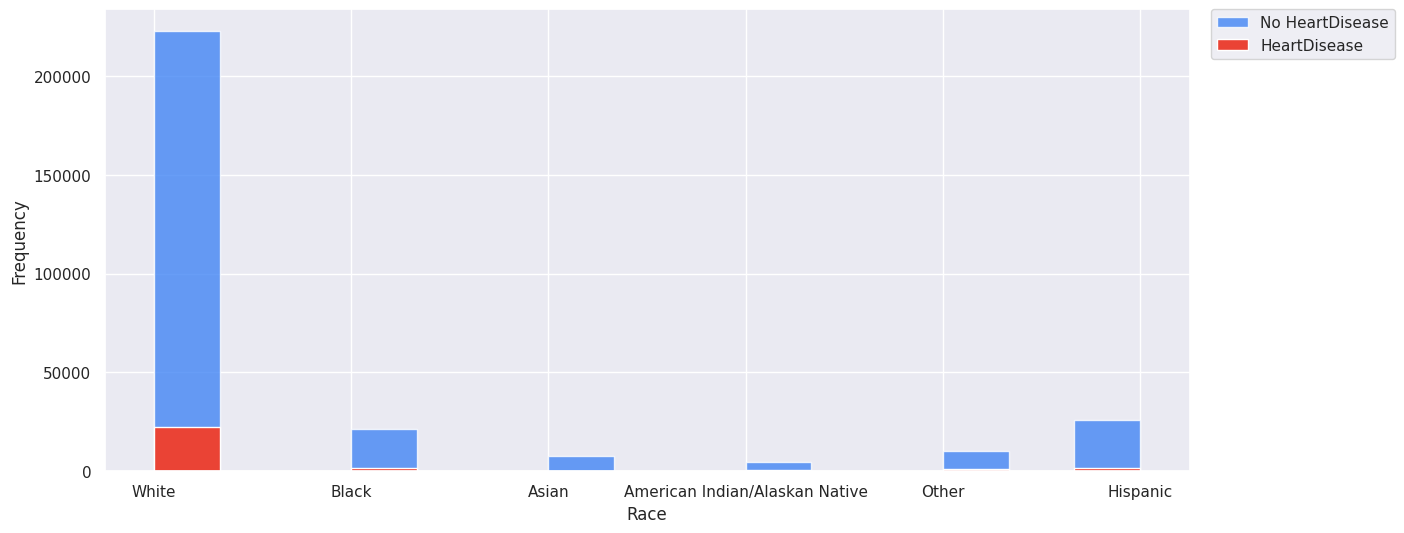

In [63]:
fig, ax = plt.subplots(figsize = (14,6))

ax.hist(heart_disease_data[heart_disease_data["HeartDisease"]==0]["Race"], bins=15, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(heart_disease_data[heart_disease_data["HeartDisease"]== 1]["Race"], bins=15, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

**X-axis**: The x-axis represents the "Race" variable, likely containing different categories associated with racial or ethnic groups.

**Y-axis**: The y-axis illustrates the frequency of occurrences, indicating the count of individuals within each bin of the histogram.

**Explanation for the outpu**t: The histogram is bifurcated into two distinct sets of bars, each corresponding to a different value of the "HeartDisease" variable (0 for "No HeartDisease" and 1 for "HeartDisease"). The alpha parameter adjusts the transparency of the bars, facilitating a clearer view when bars overlap.

Blue bars signify individuals without heart disease, while red bars represent those with heart disease. The bins parameter (set to 15) determines the number of intervals or bins into which the data is segmented along the x-axis, offering a visual representation of the distribution of races or ethnicities within these bins for both groups.

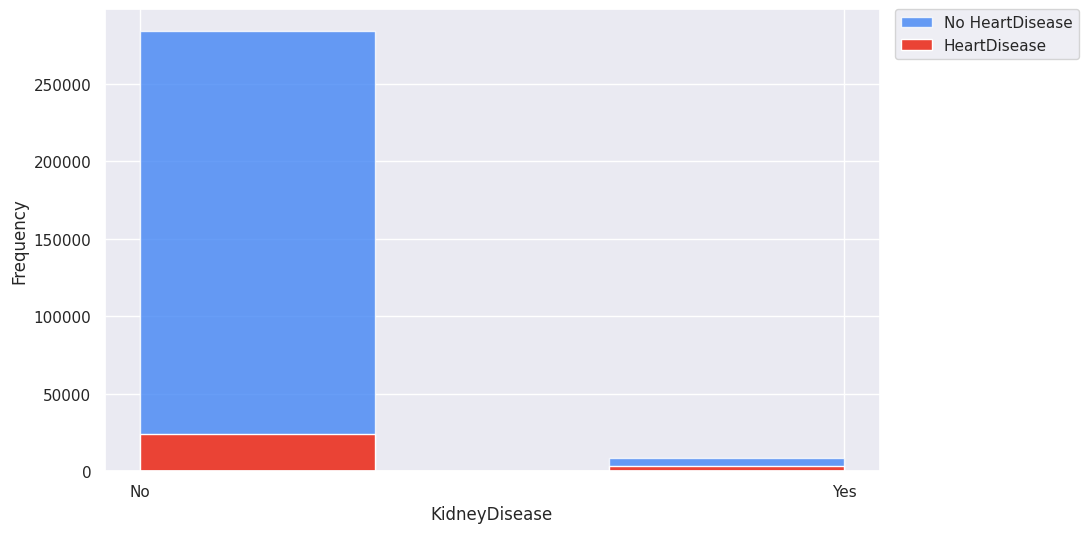

In [64]:
import matplotlib.pyplot as plt

def plot_histogram(ax, data, condition, label, color, bins=3, alpha=1):
    ax.hist(data[data["HeartDisease"] == condition]["KidneyDisease"], bins=bins, alpha=alpha, color=color, label=label)

fig, ax = plt.subplots(figsize=(10, 6))

plot_histogram(ax, heart_disease_data, 0, 'No HeartDisease', '#4285f4', alpha=0.8)

plot_histogram(ax, heart_disease_data, 1, 'HeartDisease', '#ea4335')

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

plt.show()


**X-axis**: The x-axis represents the "KidneyDisease" variable, suggesting it includes different categories or levels related to kidney health.

**Y-axis**: The y-axis illustrates the frequency of occurrences, depicting the count of individuals within each bin of the histogram.

**Explanation for the output**: The histogram is designed to display the distribution of the "KidneyDisease" variable for two distinct conditions related to heart disease. The "No HeartDisease" condition is represented by blue bars, and the "HeartDisease" condition is represented by red bars . The alpha parameter controls the transparency of the bars, allowing for clearer visualization when bars overlap.

The bins parameter (defaulted to 3) determines the number of intervals or bins into which the data is divided along the x-axis. This histogram provides a visual insight into the distribution of kidney health within the specified bins for both groups.

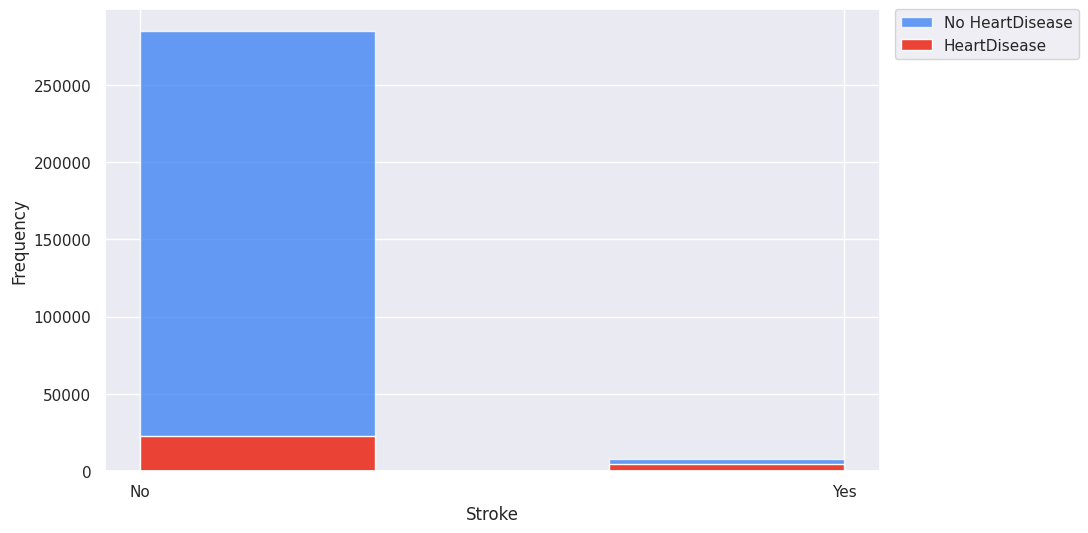

In [65]:
figure, axis = plt.subplots(figsize = (10,6))

axis.hist(heart_disease_data[heart_disease_data["HeartDisease"]== 0]["Stroke"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
axis.hist(heart_disease_data[heart_disease_data["HeartDisease"]== 1]["Stroke"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

axis.set_xlabel("Stroke")
axis.set_ylabel("Frequency")

axis.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

### APPLICABILTY

Empowering heart care through advanced heart data analysis in healthcare addresses a critical need to enhance the diagnosis, treatment, and overall management of cardiovascular conditions. This problem is relevant due to the rising prevalence of heart-related diseases and the potential for data-driven solutions to significantly improve patient outcomes. Here's a brief overview of the problem and its applicability:


**Applicability of Advanced Heart Data Analysis:**
1. **Early Detection and Prevention:** Advanced data analysis can facilitate the early detection of cardiovascular issues by identifying subtle patterns or anomalies in heart data. Machine learning algorithms can analyze continuous monitoring data from wearables, alerting healthcare providers to potential risks before symptoms manifest.

2. **Personalized Treatment Plans:** Tailoring treatment plans to individual patients is crucial for effective heart care. Advanced analytics can integrate diverse data sets, including genetic information, lifestyle factors, and historical health records, to create personalized treatment strategies. This ensures that interventions are not only timely but also aligned with the specific needs of each patient.

3. **Remote Patient Monitoring:** Remote monitoring through wearable devices allows for continuous tracking of heart-related metrics. Advanced analytics enable healthcare professionals to remotely assess patient conditions, intervene when necessary, and make data-driven adjustments to treatment plans. This can be especially valuable for patients in rural or underserved areas.

4. **Predictive Analytics for Risk Stratification:** Utilizing machine learning models, healthcare providers can employ predictive analytics to stratify patients based on their risk of developing cardiovascular events. This enables proactive management of high-risk individuals, reducing the likelihood of emergencies and improving overall outcomes.

5. **Integration of Imaging Data:** Advanced analysis of medical imaging data, such as cardiac MRI or CT scans, can enhance diagnostic accuracy and provide detailed insights into the structure and function of the heart. This can aid in surgical planning, intervention decisions, and post-treatment monitoring.

6. **Real-time Decision Support:** Implementing real-time decision support systems powered by advanced analytics can assist healthcare professionals in making informed decisions during emergency situations or routine care. This ensures that the latest data is considered in the decision-making process.

7. **Research and Development:** The aggregation and analysis of large-scale heart data sets contribute to ongoing research efforts. Insights gained from this data can fuel the development of new diagnostic tools, treatment modalities, and preventive strategies.

In summary, empowering heart care through advanced heart data analysis addresses the need for more precise, personalized, and proactive approaches to managing cardiovascular health. Leveraging cutting-edge technologies in data analytics holds the potential to revolutionize how healthcare professionals diagnose, treat, and prevent heart-related conditions, ultimately improving patient outcomes and reducing the burden of cardiovascular diseases on global healthcare systems.